In [1]:
import os
import sys

ROOT_DIR = os.path.abspath("__file__" + "/../../")
sys.path.insert(0, f"{ROOT_DIR}")

In [2]:
import numpy as np

def _get_vertex_sq_amplitudes(gridLength, root=ROOT_DIR):
    spin_j = (gridLength - 1) / 2

    vertex = np.load(f"{root}/data/EPRL_vertices/Python/Dl_20/vertex_j_{float(spin_j)}.npz")
    sq_ampl = vertex**2
    return sq_ampl

In [3]:
from src.MCMC.MCMC import VertexMCMC

iterationsNumber = int(1e5)
batchSize = int(1e4)
burnFactor = 0
deviation = 0.8
dimensions = 5
gridLength = 13
spin_j = (gridLength - 1) / 2

verbosity = 1

drawsFolder = f"{ROOT_DIR}/data/MCMC/j={float(spin_j)}/"
os.makedirs(drawsFolder, exist_ok=True)

VertexMCMC(
    gridLength = gridLength, iterationsNumber = iterationsNumber, batchSize = batchSize, 
    deviation = deviation, burnFactor = burnFactor, verbosity = verbosity, 
    drawsFolder = drawsFolder, mean = 0., rewardFunction=_get_vertex_sq_amplitudes, dimensions=dimensions 
)

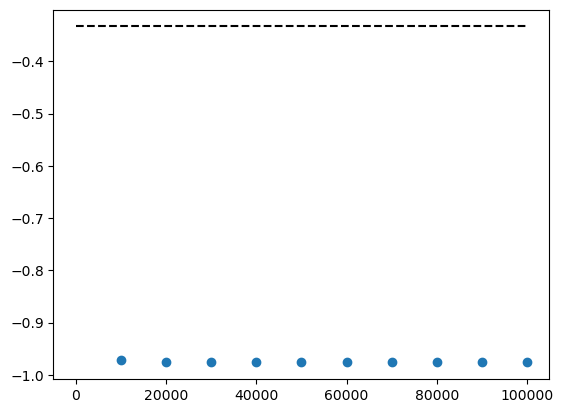

In [9]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

def load_mcmc_intertwiners(mcmc_files):
    intertwiners = []
    for file in mcmc_files:
        df = pd.read_csv(file)
        intertwiners.append(df.loc[df.index.repeat(df.multiplicity)].iloc[:, :-1].to_numpy())
    return intertwiners

def calculate_mean_cosine_dihedral_angle(intertwiners, spin):
    cos_angles = intertwiners*(intertwiners+1)/(2*spin*(spin+1)) - 1
    return cos_angles.mean(axis=0)[0]

mcmc_files = sorted(
    glob.glob(f"{ROOT_DIR}/data/MCMC/j={float(spin_j)}/draws_*.csv"), 
    key=lambda x: int(x.split(".")[-2].split("_")[-1])
)
mcmc_intertwiners = load_mcmc_intertwiners(mcmc_files)
mean_obs_mcmc = [
    calculate_mean_cosine_dihedral_angle(intertwiners, spin_j)
    for intertwiners in mcmc_intertwiners
]

xs = [int((i+1)*batchSize) for i in range(len(mcmc_files))]
plt.scatter(xs, mean_obs_mcmc)
plt.hlines(-0.33333, 1, int(iterationsNumber), colors='k', linestyles='dashed')

In [10]:
mean_obs_mcmc

[-0.9708238095238095,
 -0.9761904761906437,
 -0.9761904761906437,
 -0.9761904761906437,
 -0.9761904761906437,
 -0.9761904761906437,
 -0.9761904761906437,
 -0.9761904761906437,
 -0.9761904761906437,
 -0.9761904761906437]